<a href="https://colab.research.google.com/github/Mataeri/Learning-Torch/blob/main/Learning_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import numpy as np

## Tensors

In [4]:
np1 = np.random.rand(3,4)
np1

array([[0.11871186, 0.9098165 , 0.19542265, 0.93320673],
       [0.84982192, 0.24429924, 0.48406583, 0.83607457],
       [0.47490507, 0.16696318, 0.80495323, 0.40280486]])

In [6]:
np1.dtype

dtype('float64')

In [11]:
tensor_2d = torch.randn(3,4)
tensor_2d
#tensor_2d.dtype

tensor([[-2.2954, -0.7872, -1.1037,  2.3739],
        [-0.4176,  2.1070,  0.2055, -0.3907],
        [ 0.0693, -0.0556, -1.2758, -0.0619]])

In [8]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [9]:
## Creaot tensor out of numpy array
my_tensor = torch.tensor(np1)
my_tensor

tensor([[0.1187, 0.9098, 0.1954, 0.9332],
        [0.8498, 0.2443, 0.4841, 0.8361],
        [0.4749, 0.1670, 0.8050, 0.4028]], dtype=torch.float64)

## Tensor OPS

In [12]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
#Reshape and View
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [14]:
#Reshape with unkown nr. of items
my_torch2 = torch.arange(10)
my_torch2

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
my_torch2 = my_torch2.reshape(-1,5)
my_torch2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [21]:
my_torch3 = torch.arange(10)
my_torch3

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
my_torch3 = my_torch3.view(2,5)
my_torch3

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [26]:
# witch rshape and view, they will update
my_torch4 = torch.arange(10)
my_torch4

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
my_torch4[1] = 4000
my_torch4

tensor([   0, 4000,    2,    3,    4,    5,    6,    7,    8,    9])

In [29]:
# Slices

my_torch5 = torch.arange(10)
my_torch5

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
my_torch5[7]

tensor(7)

In [31]:
#Grab slice
my_torch6 = my_torch5.reshape(5,2)
my_torch6

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [33]:
my_torch6[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

## Tensor Basic Arithmic operators

In [34]:
tensor_a = torch.tensor([1,2,3,4,5])
tensor_b = torch.tensor([6,7,8,9,10])

In [35]:
#Addition
tensor_a + tensor_b

tensor([ 7,  9, 11, 13, 15])

In [36]:
#Addition longhand
torch.add(tensor_a, tensor_b)

tensor([ 7,  9, 11, 13, 15])

In [38]:
#Subtraction
tensor_b - tensor_a #longhand sub

tensor([5, 5, 5, 5, 5])

In [39]:
#Multilpication
tensor_a * tensor_b #longhand mul

tensor([ 6, 14, 24, 36, 50])

In [40]:
#Division
tensor_b / tensor_a #longhand div

tensor([6.0000, 3.5000, 2.6667, 2.2500, 2.0000])

In [41]:
# remaind modulus
tensor_b % tensor_a #longhand remainder

tensor([0, 1, 2, 1, 0])

In [42]:
# exponents
tensor_a ** tensor_b #longhand pow, alternate tensor_a.add(tensor_b)

tensor([      1,     128,    6561,  262144, 9765625])

In [45]:
#reassignment
tensor_a.add_(tensor_b)
tensor_a

tensor([13, 16, 19, 22, 25])

In [46]:
tensor_a += tensor_b #shorthand
tensor_a

tensor([19, 23, 27, 31, 35])

In [47]:
tensor_a *= tensor_b
tensor_a

tensor([114, 161, 216, 279, 350])

In [56]:
tensor_c = torch.tensor([1,2,3,4,5])
tensor_d = torch.tensor([6,7,8,9,10])

#tensor_c.div_(tensor_d) #no reassigning div neither short nor longhand
tensor_c

tensor([1, 2, 3, 4, 5])

## Basic Neural Network (Iris Flower set example)

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [58]:
# Create model class tha tinherits the nn.Module

class Model(nn.Module):
  # Input Layer (The features of the classification - in this case 4 features of flower, petal length, etc.) ->
  #Hidden Layer 1 (some numbers of Neurons) -->
  #H2 (some number of neurons) -> output (one 3 classes of iris flowers)

  def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
    super().__init__() # Instantiates nn.Module
    self.fc1 = nn.Linear(in_features, h1) #Input Layer
    self.fc2 = nn.Linear(h1, h2) #Hidden Layer 1
    self.out = nn.Linear(h2, out_features) #Output Layer

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [59]:
torch.manual_seed(41) #for this example to get the same numbers as tutorial
model = Model()

In [61]:
#for charting
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [64]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
#Change class column from string to float
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df.head()

<ipython-input-67-ebddc04cb3fd>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [70]:
# Train Test Split! Set X, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [71]:
# Convert to numpy arrays
X = X.values
y = y.values

In [72]:
from sklearn.model_selection import train_test_split

In [75]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [76]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train) #64 bit integers convert so we get integers since we only want 0,1,2
y_test = torch.LongTensor(y_test)

In [77]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose Optimizer (Adam, cuz it's popular), lr = learning rate (if error doesn't go down after a bunch of iterations (epochs) we wanna lower our learning rate - why? )

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [79]:
# Train the Model!
# How many Epochs (one run through all the training data in our Network)
epochs = 100
losses = [] #we'll apend our losses as we go on

for i in range(epochs):
  #Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  #Measure loss, high at first (usually)
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  #keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs to see some data and see whats going on

  if i % 10 == 0:
    print(f'Epoch: {i} and Loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back, to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and Loss: 1.1318050622940063
Epoch: 10 and Loss: 0.9658581614494324
Epoch: 20 and Loss: 0.67915278673172
Epoch: 30 and Loss: 0.40087202191352844
Epoch: 40 and Loss: 0.22570066154003143
Epoch: 50 and Loss: 0.12255845218896866
Epoch: 60 and Loss: 0.07509137690067291
Epoch: 70 and Loss: 0.05467577651143074
Epoch: 80 and Loss: 0.04448390752077103
Epoch: 90 and Loss: 0.038461681455373764


Text(0.5, 0, 'epoch')

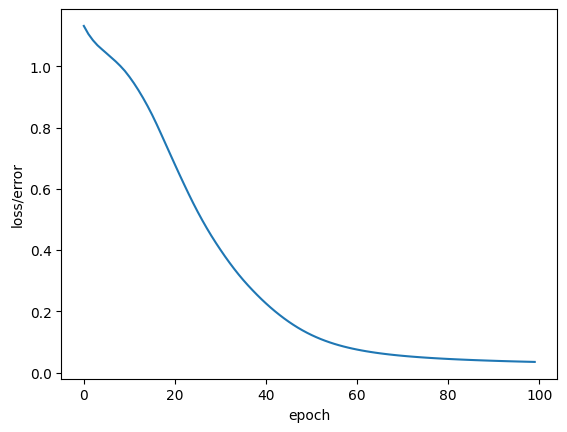

In [80]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [82]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): #turn off back propagation - not sure why he wants to do that
  y_eval = model.forward(X_test) #X_text are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test)  # Find the loss

loss

tensor(0.1458)

In [92]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1.) tensor([-7.7132,  1.5807,  4.8588]) 	 2
2.) tensor([-10.2249,   0.5155,   8.7638]) 	 2
3.) tensor([-10.7185,   1.1882,   8.2269]) 	 2
4.) tensor([-4.4690,  3.5339, -1.1210]) 	 1
5.) tensor([-9.0873,  1.4669,  6.2793]) 	 2
6.) tensor([-2.2770,  3.7022, -4.1140]) 	 1
7.) tensor([-7.0673,  2.2028,  3.2917]) 	 2
8.) tensor([-4.2226,  3.6468, -1.5420]) 	 1
9.) tensor([-8.0634,  1.8251,  4.7820]) 	 2
10.) tensor([-10.8515,   0.5058,   9.3629]) 	 2
11.) tensor([-6.8611,  2.2126,  3.0811]) 	 2
12.) tensor([  9.4301,   3.2669, -18.8494]) 	 0
13.) tensor([  8.5966,   2.9338, -17.1305]) 	 0
14.) tensor([-1.0571,  3.1664, -4.7063]) 	 1
15.) tensor([  8.0257,   3.2468, -16.7651]) 	 0
16.) tensor([-6.7032,  2.4148,  2.6586]) 	 2
17.) tensor([  8.4607,   3.0915, -17.1118]) 	 0
18.) tensor([-7.5983,  1.7014,  4.5610]) 	 1
19.) tensor([  9.0443,   3.1470, -18.0944]) 	 0
20.) tensor([  7.7209,   2.9005, -15.7171]) 	 0
21.) tensor([-1.6889,  3.3903, -4.2968]) 	 1
22.) tensor([-10.0090,   1.0498,   7.

In [93]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [95]:
with torch.no_grad():
  print(model(new_iris))

tensor([  9.2014,   3.0883, -18.2702])


### Save and load the model

In [96]:
# Save our NN Model

torch.save(model.state_dict(), 'iris_example_model.pt')

In [97]:
# Load the saved Model

new_model = Model()
new_model.load_state_dict(torch.load('iris_example_model.pt'))

<ipython-input-97-7910856ac375>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_example_model.pt'))


<All keys matched successfully>

In [98]:
# make sure it is correctly loaded

new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)

### Convolutional Neural Networks